In [10]:
import matplotlib.pyplot as plt
import matplotlib as mpl # 한글 폰트 설정 (NanumGothic)
mpl.rcParams['font.family'] = 'NanumGothic'
mpl.rcParams['axes.unicode_minus'] = False # 마이너스 기호 깨짐 방지


In [11]:
# api 
import FinanceDataReader as fdr

kospi = fdr.DataReader(symbol='KS11', start='2022') # KS000011

In [12]:
kospi['rolling5'] = kospi['Close'].rolling(window=5).mean()
kospi['rolling20'] = kospi['Close'].rolling(window=20).mean()
kospi['rolling60'] = kospi['Close'].rolling(window=60).mean()
kospi['rolling120'] = kospi['Close'].rolling(window=120).mean()
kospi

,Open,High,Low,Close,Volume,Change,UpDown,Comp,Amount,MarCap,rolling5,rolling20,rolling60,rolling120
Date,,,,,,,,,,,,,,
2022-01-03,2998.32,3010.77,2979.42,2988.77,435825854,0.0037,1,11.12,8193887264228,2211373367405162,NaN,NaN,NaN,NaN
2022-01-04,2991.97,2995.25,2973.08,2989.24,621549385,0.0002,1,0.47,9991473942836,2212087919930193,NaN,NaN,NaN,NaN
2022-01-05,2984.05,2986.20,2936.73,2953.97,787346121,-0.0118,2,-35.27,15428422516445,2186715367040906,NaN,NaN,NaN,NaN
2022-01-06,2925.40,2952.54,2915.38,2920.53,786045066,-0.0113,2,-33.44,13297135242112,2162437324139180,NaN,NaN,NaN,NaN
2022-01-07,2933.78,2959.03,2933.10,2954.89,546172478,0.0118,1,34.36,10582421237357,2187560533655431,2961.480,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-12-17,2487.31,2487.31,2455.05,2456.81,559039721,-0.0129,2,-32.16,9284835596090,2010343832541547,2472.974,2470.7190,2538.001167,2622.996667
2024-12-18,2463.06,2492.00,2462.82,2484.43,441677820,0.0112,1,27.62,8338565732727,2033135712509950,2481.358,2470.8260,2536.185500,2620.660833
2024-12-19,2426.55,2450.05,2423.59,2435.93,504467068,-0.0195,2,-48.50,8443749654047,1993417137823853,2472.120,2468.5910,2533.417500,2617.840333


In [23]:
def min_max(serise) :
    # 최소값과 최대값 찾기
    min_value = serise.min()
    max_value = serise.max()

    # boolean indexing으로 인덱스 찾기
    min_indices = serise[serise == min_value].index
    max_indices = serise[serise == max_value].index
    return min_indices, max_indices


In [22]:
# 출력 수정
min_close, max_close = min_max(kospi["Close"])
print(f'Close : ({min_close}, {max_close})')

min_rolling5, max_rolling5 = min_max(kospi["rolling5"])
print(f'rolling5 : ({min_rolling5}, {max_rolling5})')

min_rolling20, max_rolling20 = min_max(kospi["rolling20"])
print(f'rolling20 : ({min_rolling20}, {max_rolling20})')

min_rolling60, max_rolling60 = min_max(kospi["rolling60"])
print(f'rolling60 : ({min_rolling60}, {max_rolling60})')

min_rolling120, max_rolling120 = min_max(kospi["rolling120"])
print(f'rolling120 : ({min_rolling120}, {max_rolling120})')

Close : (DatetimeIndex(['2022-09-30'], dtype='datetime64[ns]', name='Date', freq=None), DatetimeIndex(['2022-01-04'], dtype='datetime64[ns]', name='Date', freq=None))
rolling5 : (DatetimeIndex(['2022-10-05'], dtype='datetime64[ns]', name='Date', freq=None), DatetimeIndex(['2022-01-07'], dtype='datetime64[ns]', name='Date', freq=None))
rolling20 : (DatetimeIndex(['2022-10-25'], dtype='datetime64[ns]', name='Date', freq=None), DatetimeIndex(['2022-01-28'], dtype='datetime64[ns]', name='Date', freq=None))
rolling60 : (DatetimeIndex(['2022-11-29'], dtype='datetime64[ns]', name='Date', freq=None), DatetimeIndex(['2022-04-01'], dtype='datetime64[ns]', name='Date', freq=None))
rolling120 : (DatetimeIndex(['2023-02-27'], dtype='datetime64[ns]', name='Date', freq=None), DatetimeIndex(['2024-08-02'], dtype='datetime64[ns]', name='Date', freq=None))


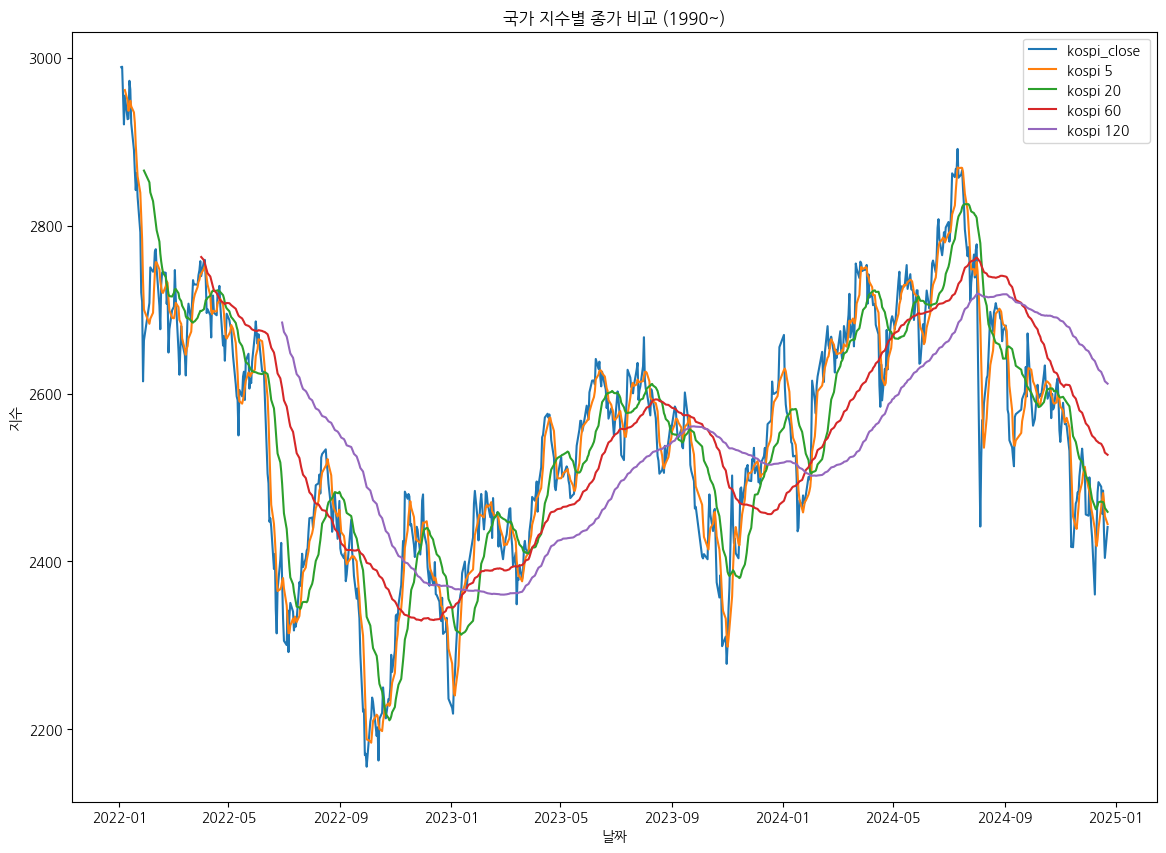

In [13]:
plt.figure(figsize=(14,10), dpi=100)
plt.plot(kospi.index, kospi['Close'], label='kospi_close ') 
plt.plot(kospi.index, kospi['rolling5'] , label='kospi 5') 
plt.plot(kospi.index, kospi['rolling20'] , label='kospi 20') 
plt.plot(kospi.index, kospi['rolling60'] , label='kospi 60') 
plt.plot(kospi.index, kospi['rolling120'] , label='kospi 120') 

plt.title('국가 지수별 종가 비교 (1990~)')
plt.xlabel('날짜')
plt.ylabel('지수')
plt.legend()
plt.show()